In [14]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [15]:
# Files to load
credits_data = "credits.csv"
titles_data = "titles.csv"

In [16]:
credits_df = pd.read_csv(credits_data)
credits_df.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [17]:
titles_df = pd.read_csv(titles_data)
titles_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [18]:
# Combine data into single dataset
netflix_data_combined = pd.merge(titles_df, credits_df, how = "left", on = ["id"])
netflix_data_combined.tail()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
77580,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,2.186,NaN,157590.0,Lucien Morgan,Dr. Ian Stones,ACTOR
77581,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,2.186,NaN,129059.0,Magdalena Korpas,Jane,ACTOR
77582,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,2.186,NaN,2050199.0,Mistura Olusanya,Nurse Titi,ACTOR
77583,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,2.186,NaN,2050423.0,Yemi Amodu,NaN,DIRECTOR
77584,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021,NaN,0,"['family', 'comedy', 'animation']",[],1.0,tt13711094,8.8,16.0,0.979,10.0,NaN,NaN,NaN,NaN


In [19]:
netflix_data_combined.count()

id                      77585
title                   77584
type                    77585
description             77524
release_year            77585
age_certification       46840
runtime                 77585
genres                  77585
production_countries    77585
seasons                 14247
imdb_id                 73726
imdb_score              73257
imdb_votes              73168
tmdb_popularity         77482
tmdb_score              76322
person_id               77213
name                    77213
character               67586
role                    77213
dtype: int64

In [20]:
# Dropping Null values
cleaned_netflix_data = netflix_data_combined.drop_duplicates("id")
cleaned_netflix_data

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN,NaN,NaN,NaN,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,3748.0,Robert De Niro,Travis Bickle,ACTOR
38,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8,11472.0,Graham Chapman,King Arthur / Voice of God / Middle Head / Hic...,ACTOR
86,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8,11472.0,Graham Chapman,Wise Man #2 / Brian Cohen / Biggus Dickus,ACTOR
108,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7,1700.0,Ellen Burstyn,Chris MacNeil,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77544,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0,0.966,NaN,269015.0,Richard Mofe-Damijo,Mr. George,ACTOR
77556,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN,1.036,8.5,2046253.0,Edis Görgülü,Self,ACTOR
77558,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0,0.709,NaN,67122.0,Omoni Oboli,Nneka,ACTOR
77569,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,2.186,NaN,372931.0,Jide Kosoko,Chief Atilola,ACTOR


In [21]:
netflix_data = cleaned_netflix_data[["id", "title", "type", "release_year", "genres", "imdb_score",
                                             "tmdb_popularity","tmdb_score", "name"]]

netflix_data.head()                                    

,id,title,type,release_year,genres,imdb_score,tmdb_popularity,tmdb_score,name
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,['documentation'],NaN,0.600,NaN,NaN
1,tm84618,Taxi Driver,MOVIE,1976,"['crime', 'drama']",8.3,27.612,8.2,Robert De Niro
38,tm127384,Monty Python and the Holy Grail,MOVIE,1975,"['comedy', 'fantasy']",8.2,18.216,7.8,Graham Chapman
86,tm70993,Life of Brian,MOVIE,1979,['comedy'],8.0,17.505,7.8,Graham Chapman
108,tm190788,The Exorcist,MOVIE,1973,['horror'],8.1,95.337,7.7,Ellen Burstyn


In [22]:
netflix_data.count()

id                 5806
title              5805
type               5806
release_year       5806
genres             5806
imdb_score         5283
tmdb_popularity    5712
tmdb_score         5488
name               5434
dtype: int64

In [24]:
# Create dataframe with genre as action
action_df = netflix_data[netflix_data["genres"].str.contains("action")]
action_df.head()


,id,title,type,release_year,genres,imdb_score,tmdb_popularity,tmdb_score,name
155,tm14873,Dirty Harry,MOVIE,1971,"['thriller', 'crime', 'action']",7.7,14.745,7.5,Clint Eastwood
250,tm119281,Bonnie and Clyde,MOVIE,1967,"['drama', 'crime', 'action']",7.7,15.309,7.5,Warren Beatty
267,tm67378,The Professionals,MOVIE,1966,"['western', 'action', 'european']",7.3,12.155,7.1,Burt Lancaster
293,tm44204,The Guns of Navarone,MOVIE,1961,"['war', 'action', 'drama']",7.5,15.405,7.4,Gregory Peck
317,tm69778,Lupin the Third: The Castle of Cagliostro,MOVIE,1979,"['comedy', 'animation', 'action', 'fantasy', '...",7.6,14.008,7.5,Yasuo Yamada


In [36]:
# Action movies by year
action_movies_by_year = action_df.groupby("release_year").count()["title"]
action_movies_by_year = movies_by_year.sort_values(ascending = False)
action_movies_by_year

release_year
2021    129
2018    124
2019    121
2020    119
2017     86
2016     71
2015     47
2014     39
2022     33
2012     30
2013     29
2011     27
2008     25
2010     22
2009     15
2007     14
2004     11
2003     10
1993      9
1998      9
2005      9
1995      8
1997      8
2002      7
2006      7
2001      5
2000      4
1991      4
1999      3
1986      3
1984      3
1994      3
1990      2
1988      2
1982      2
1979      2
1981      1
1989      1
1987      1
1980      1
1978      1
1961      1
1967      1
1966      1
1963      1
1971      1
1956      1
Name: title, dtype: int64

In [38]:
# Total action movies
action_movies_by_year.sum()

1053

In [27]:
# Average IMDb score for all action movies
action_avg = action_df["imdb_score"].mean(skipna = True)
action_avg

6.4573802541544465

In [68]:
# Movies that were most popular on Netflix using TMDb scores
action_popularity_df = action_df.nlargest(10, "tmdb_popularity")
action_popularity_df

,id,title,type,release_year,genres,imdb_score,tmdb_popularity,tmdb_score,name
68841,tm810504,Yaksha: Ruthless Operations,MOVIE,2022,"['action', 'thriller', 'crime']",6.2,1275.252,6.2,Sol Kyung-gu
66812,tm1064065,Black Crab,MOVIE,2022,"['war', 'action', 'drama', 'scifi', 'thriller']",5.6,944.405,6.2,Noomi Rapace
66251,tm1082564,The Adam Project,MOVIE,2022,"['drama', 'action', 'comedy', 'scifi']",6.7,919.599,7.0,Ryan Reynolds
69683,tm1159163,Fistful of Vengeance,MOVIE,2022,"['fantasy', 'action', 'crime', 'drama']",4.5,829.005,5.4,Iko Uwais
4575,ts9,The Walking Dead,SHOW,2010,"['action', 'drama', 'scifi', 'thriller', 'horr...",8.2,773.190,8.1,Norman Reedus
17409,ts11188,The Flash,SHOW,2014,"['scifi', 'drama', 'action']",7.6,751.315,7.8,Grant Gustin
67149,ts225855,All of Us Are Dead,SHOW,2022,"['action', 'scifi', 'thriller', 'drama', 'fant...",7.5,678.734,8.5,Park Ji-hu
68626,tm1087461,Last Man Down,MOVIE,2021,"['thriller', 'scifi', 'action']",5.0,505.736,6.3,Daniel Stisen
66430,ts270910,Vikings: Valhalla,SHOW,2022,"['war', 'action', 'drama', 'history', 'romance']",7.1,504.811,8.1,Sam Corlett
70951,tm1164962,Restless,MOVIE,2022,"['thriller', 'action', 'crime']",5.8,493.927,6.0,Franck Gastambide


In [54]:
# Actor/Actress most featured in action movies
actor_df = action_df.groupby(["name"]).count()["title"].sort_values(ascending = False)
actor_df.head(40)

name
Ajay Devgn               8
Shah Rukh Khan           8
Junko Takeuchi           7
Akshay Kumar             7
Antonio Banderas         6
Bruce Willis             6
Saif Ali Khan            6
Scott Adkins             5
Amitabh Bachchan         5
Michael Jai White        5
John Abraham             4
Yuki Kaji                4
Hrithik Roshan           4
Kappei Yamaguchi         4
Donnie Yen               4
Mamoru Miyano            4
Hiroaki Hirata           4
Takeru Satoh             4
Mayumi Tanaka            4
Shahid Kapoor            4
Noomi Rapace             4
Salman Khan              3
Wesley Snipes            3
Prabhas                  3
Hiroaki Iwanaga          3
Hwang Jung-min           3
Louis Koo                3
Mario Casas              3
Iko Uwais                3
Tom Cruise               3
Vijay                    3
Mark Wahlberg            3
Anthony Mackie           3
Megumi Ogata             3
Arnold Schwarzenegger    3
Song Joong-ki            3
Bear Grylls            

<IPython.core.display.Javascript object>


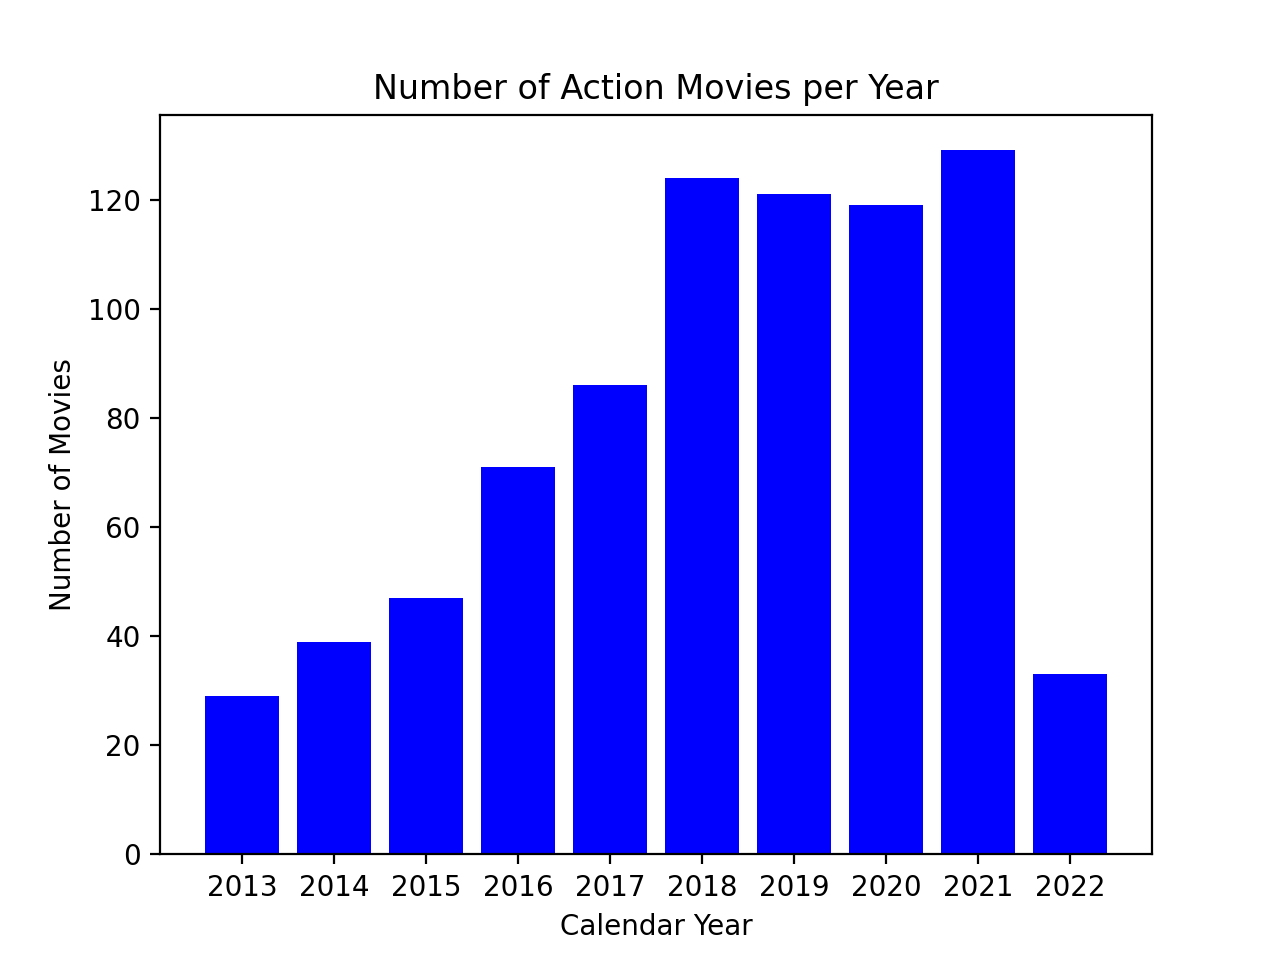

In [62]:
# Bar graph for the number of movies per year (10 most recent years)
%matplotlib notebook
x_axis = [2022,2021,2020,2019,2018,2017,2016,2015,2014,2013]
y_axis = [33,129,119,121,124,86,71,47,39,29]
plt.bar(x_axis,y_axis, color = "blue", align = "center", tick_label = x_axis)
plt.title("Number of Action Movies per Year")
plt.xlabel("Calendar Year")
plt.ylabel("Number of Movies")
plt.show()

<IPython.core.display.Javascript object>


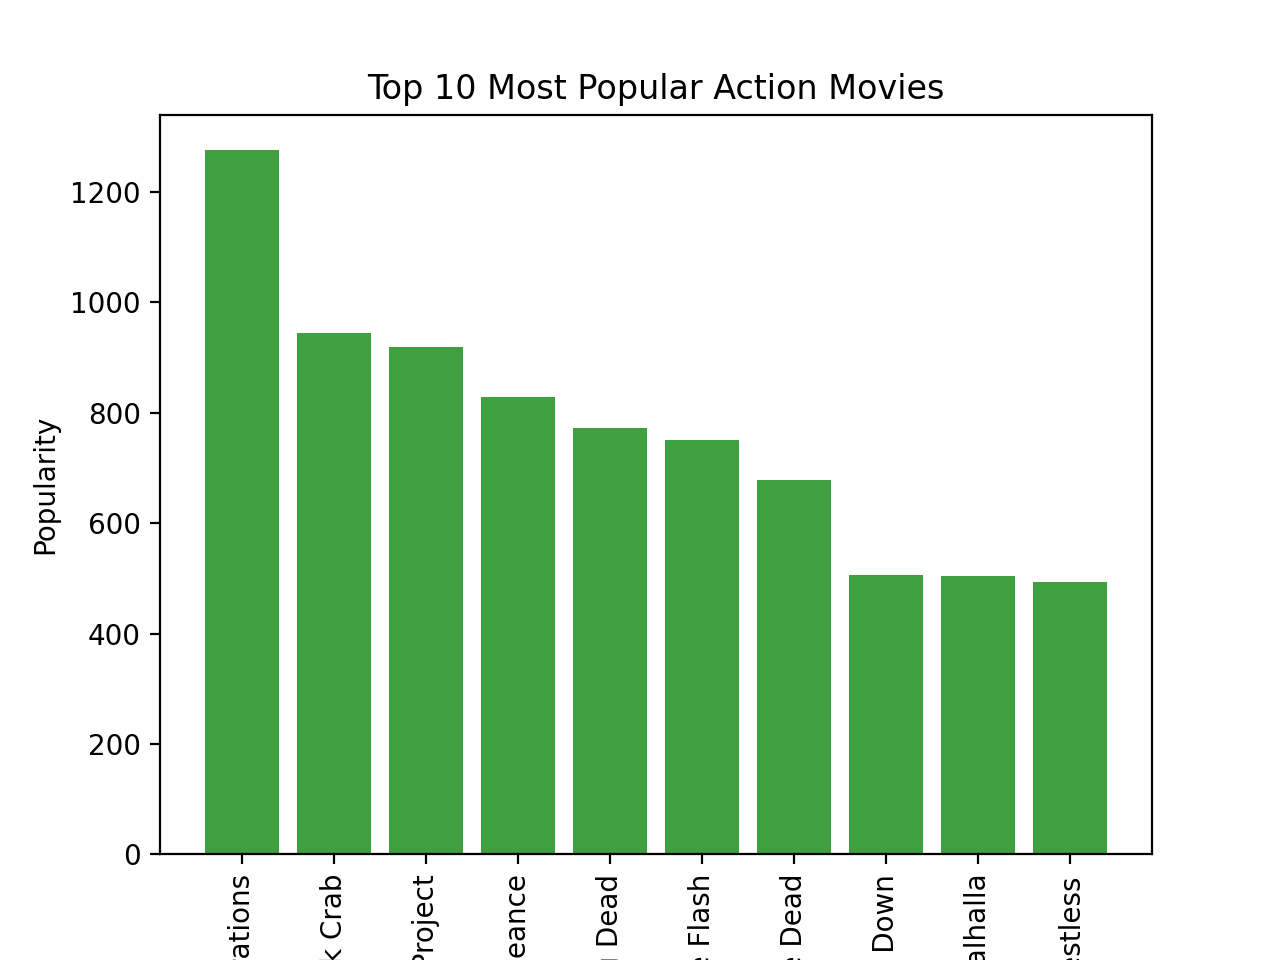

In [80]:
# Bar graph of most popular action movie by tmdb_popularity
%matplotlib notebook
x_axis = np.arange(len(action_popularity_df["title"]))
y_axis = (action_popularity_df["tmdb_popularity"])
plt.bar(x_axis,y_axis, color = "green", align = "center", alpha = 0.75, tick_label = x_axis)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Yaksha: Ruthless Operations", "Black Crab", "The Adam Project", "Fistful of Vengeance",
                           "The Walking Dead", "The Flash", "All of Us Are Dead", "Last Man Down", 
                           "Vikings: Valhalla", "Restless"], rotation = "vertical")
plt.title("Top 10 Most Popular Action Movies")
plt.xlabel("Movie Title")
plt.ylabel("Popularity")
plt.show()